In [ ]:
#!pip install git+https://github.com/aimclub/FEDOT.git

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp']['value'].to_numpy()
ts_real_traffic = ts_tabular[ts_tabular['label']=='traffic_volume'].to_numpy()
ts_real_oil = ts_tabular[ts_tabular['label']=='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)']['value'].to_numpy()
#ts_tabular.label.value_counts()

FileNotFoundError: ignored

In [ ]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [ ]:
horizon = 100
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 2000
end = 3000
series = 4

if series == 'oil':
  init_series = ts_real_oil
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'traffic':
  init_series = ts_real_traffic
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'temp':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]  
    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]   

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
 
idx = np.array( range(len(np.array(ts))) )
train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=5,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-12-01 14:57:54,317 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 14:57:54,325 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 14:57:54,334 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 14:57:54,337 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 14:57:54,342 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-12-01 14:57:54,346 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-12-01 14:57:54,580 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 14:57:54,952 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 14:57:54,957 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 14:57:54,961 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 14:57:54,965 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 14:57:54,973 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-12-01 14:57:54,983 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-12-01 14:57:54,994 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.7 sec.


2022-12-01 14:57:55,001 - ApiComposer - Initial pipeline was fitted in 0.7 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['gaussian_filter', 'normalization', 'pca', 'locf', 'lagged', 'smoothing', 'ets', 'adareg', 'polyfit', 'fast_ica', 'diff_filter', 'ts_naive_average', 'glm', 'lasso', 'arima', 'dtreg', 'ar', 'scaling', 'sgdr', 'ridge', 'sparse_lagged', 'linear', 'cut', 'stl_arima'].


2022-12-01 14:57:55,021 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['gaussian_filter', 'normalization', 'pca', 'locf', 'lagged', 'smoothing', 'ets', 'adareg', 'polyfit', 'fast_ica', 'diff_filter', 'ts_naive_average', 'glm', 'lasso', 'arima', 'dtreg', 'ar', 'scaling', 'sgdr', 'ridge', 'sparse_lagged', 'linear', 'cut', 'stl_arima'].


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-12-01 14:57:55,038 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-12-01 14:57:55,045 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 14:57:55,058 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-12-01 14:58:04,086 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.746 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 14:58:04,101 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.746 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 14:58:05,991 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-12-01 15:01:28,704 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.689 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 15:01:28,709 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.689 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - Next population size: 21; max graph depth: 5


2022-12-01 15:01:28,714 - EvoGraphOptimizer - Next population size: 21; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 15:01:29,415 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-12-01 15:03:37,821 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.688 ComplexityMetricsEnum.node_num=0.300>']


2022-12-01 15:03:37,827 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.688 ComplexityMetricsEnum.node_num=0.300>']


CRITICAL:root:GroupedCondition - Optimisation stopped: Time limit is reached


2022-12-01 15:03:37,834 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:  33%|███▎      | 1/3 [05:42<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 5.713 min


2022-12-01 15:03:37,839 - OptimisationTimer - Composition time: 5.713 min


INFO:root:OptimisationTimer - Algorithm was terminated due to processing time limit


2022-12-01 15:03:37,843 - OptimisationTimer - Algorithm was terminated due to processing time limit


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-12-01 15:03:37,848 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.688 ComplexityMetricsEnum.node_num=0.300>']


2022-12-01 15:03:37,852 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=2.688 ComplexityMetricsEnum.node_num=0.300>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 15:03:37,855 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 5.7 min


2022-12-01 15:03:37,859 - EvoGraphOptimizer - spent time: 5.7 min


INFO:root:GPComposer - GP composition finished


2022-12-01 15:03:37,864 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-12-01 15:03:38,444 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-12-01 15:03:38,694 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {}
lagged - {'window_size': 10}


2022-12-01 15:03:38,706 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {}
lagged - {'window_size': 10}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 15:03:38,717 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 15:03:38,723 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 15:03:38,731 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 15:03:38,739 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 15:03:38,746 - PrimaryNode - Predict in primary node by operation: lagged


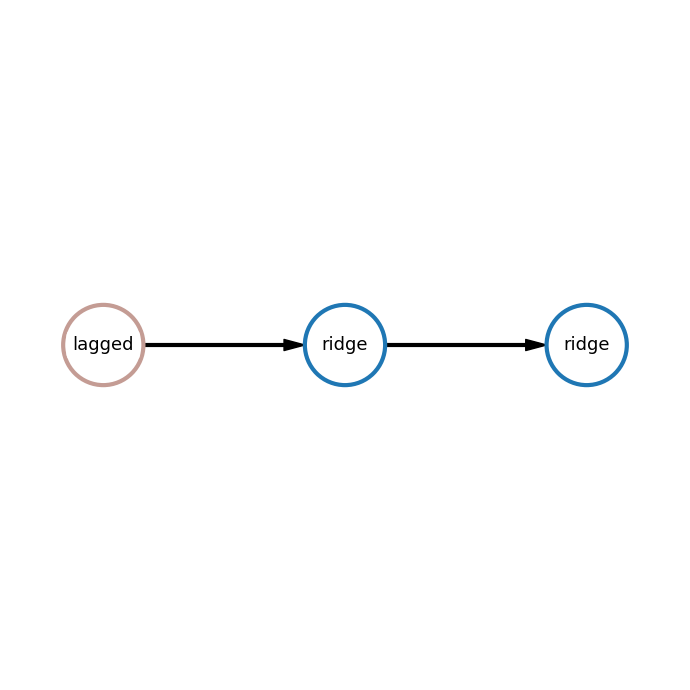

In [ ]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

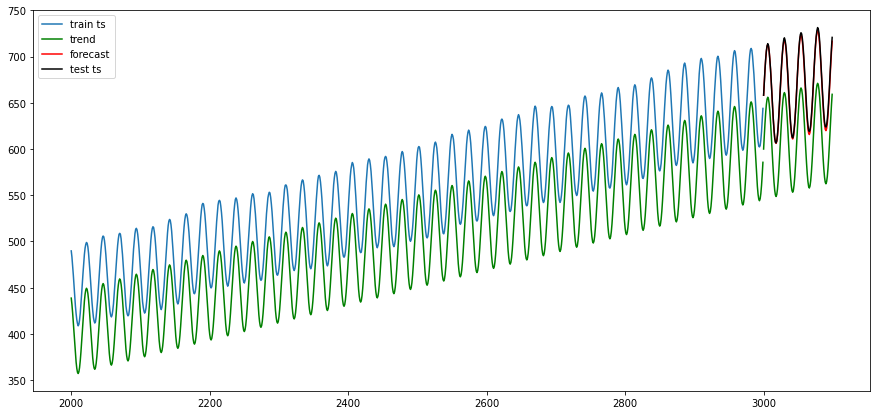

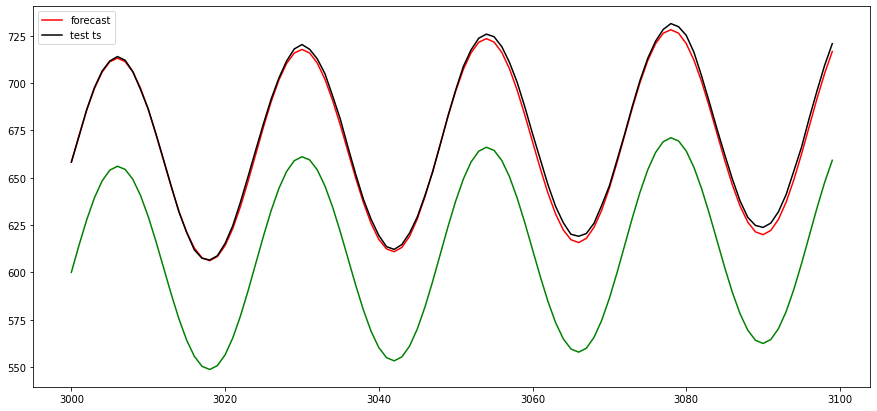

In [ ]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [ ]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [ ]:
#importing for tuning

from fedot.core.pipelines.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 15:04:14,619 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 15:04:14,627 - DataSourceSplitter - Hold out validation is applied.


In [ ]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [ ]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-2]:
         fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))
    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-2]: #[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [ ]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [ ]:
x = conf_int_maker(model = model, number_models =5,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


ggg
Fitting pipeline №1
2022-12-01 15:04:45,095 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {}
locf - {'part_for_repeat': -1}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226


2022-12-01 15:04:45,580 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {}
locf - {'part_for_repeat': -1}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002586 seconds


2022-12-01 15:04:45,608 - build_posterior_wrapper took 0.002586 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:04:45,620 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003757 seconds


2022-12-01 15:04:46,136 - build_posterior_wrapper took 0.003757 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.226973


2022-12-01 15:04:46,151 - TPE using 1/1 trials with best loss 1.226973
 20%|██        | 2/10 [00:00<00:06,  1.24trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003759 seconds


2022-12-01 15:04:46,949 - build_posterior_wrapper took 0.003759 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.226973


2022-12-01 15:04:46,958 - TPE using 2/2 trials with best loss 1.226973
 30%|███       | 3/10 [00:01<00:05,  1.18trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002764 seconds


2022-12-01 15:04:47,825 - build_posterior_wrapper took 0.002764 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.226973


2022-12-01 15:04:47,833 - TPE using 3/3 trials with best loss 1.226973
 40%|████      | 4/10 [00:02<00:04,  1.37trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003289 seconds


2022-12-01 15:04:48,419 - build_posterior_wrapper took 0.003289 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.226973


2022-12-01 15:04:48,426 - TPE using 4/4 trials with best loss 1.226973
 50%|█████     | 5/10 [00:03<00:04,  1.09trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002612 seconds


2022-12-01 15:04:49,624 - build_posterior_wrapper took 0.002612 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.226973


2022-12-01 15:04:49,632 - TPE using 5/5 trials with best loss 1.226973
 60%|██████    | 6/10 [00:04<00:03,  1.04trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003858 seconds


2022-12-01 15:04:50,670 - build_posterior_wrapper took 0.003858 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.226973


2022-12-01 15:04:50,684 - TPE using 6/6 trials with best loss 1.226973
 70%|███████   | 7/10 [00:05<00:02,  1.03trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002739 seconds


2022-12-01 15:04:51,654 - build_posterior_wrapper took 0.002739 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.226973


2022-12-01 15:04:51,664 - TPE using 7/7 trials with best loss 1.226973
 80%|████████  | 8/10 [00:06<00:02,  1.06s/trial, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002669 seconds


2022-12-01 15:04:52,884 - build_posterior_wrapper took 0.002669 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.226973


2022-12-01 15:04:52,892 - TPE using 8/8 trials with best loss 1.226973
 90%|█████████ | 9/10 [00:07<00:00,  1.07trial/s, best loss: 1.2269733626535462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003067 seconds


2022-12-01 15:04:53,554 - build_posterior_wrapper took 0.003067 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.226973


2022-12-01 15:04:53,566 - TPE using 9/9 trials with best loss 1.226973
100%|██████████| 10/10 [00:08<00:00,  1.11trial/s, best loss: 1.2269733626535462]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:04:54,763 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


2022-12-01 15:04:54,779 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 2.733850986349019}
locf - {'part_for_repeat': -1}
ridge - {'alpha': 4.2509826616862325}
lagged - {'window_size': 10}


2022-12-01 15:04:54,786 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 2.733850986349019}
locf - {'part_for_repeat': -1}
ridge - {'alpha': 4.2509826616862325}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.227


2022-12-01 15:04:54,793 - PipelineTuner - Final metric: 1.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:04:55,349 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 2.733850986349019}
locf - {'part_for_repeat': -1}
ridge - {'alpha': 4.2509826616862325}
lagged - {'window_size': 10} 
Initial metric: 0.669


2022-12-01 15:04:55,834 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 2.733850986349019}
locf - {'part_for_repeat': -1}
ridge - {'alpha': 4.2509826616862325}
lagged - {'window_size': 10} 
Initial metric: 0.669
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002848 seconds


2022-12-01 15:04:55,854 - build_posterior_wrapper took 0.002848 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:04:55,861 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003775 seconds


2022-12-01 15:04:56,375 - build_posterior_wrapper took 0.003775 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.669498


2022-12-01 15:04:56,383 - TPE using 1/1 trials with best loss 0.669498
 20%|██        | 2/10 [00:01<00:10,  1.36s/trial, best loss: 0.6694980698537613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004185 seconds


2022-12-01 15:04:57,742 - build_posterior_wrapper took 0.004185 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.669498


2022-12-01 15:04:57,751 - TPE using 2/2 trials with best loss 0.669498
 30%|███       | 3/10 [00:02<00:07,  1.02s/trial, best loss: 0.6694980698537613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003028 seconds


2022-12-01 15:04:58,518 - build_posterior_wrapper took 0.003028 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.669498


2022-12-01 15:04:58,526 - TPE using 3/3 trials with best loss 0.669498
 40%|████      | 4/10 [00:02<00:05,  1.12trial/s, best loss: 0.6694980698537613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003764 seconds


2022-12-01 15:04:59,257 - build_posterior_wrapper took 0.003764 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.669498


2022-12-01 15:04:59,266 - TPE using 4/4 trials with best loss 0.669498
 50%|█████     | 5/10 [00:03<00:04,  1.12trial/s, best loss: 0.6694980698537613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003423 seconds


2022-12-01 15:05:00,152 - build_posterior_wrapper took 0.003423 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.669498


2022-12-01 15:05:00,161 - TPE using 5/5 trials with best loss 0.669498
 60%|██████    | 6/10 [00:04<00:03,  1.17trial/s, best loss: 0.6464227374238903]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003781 seconds


2022-12-01 15:05:00,936 - build_posterior_wrapper took 0.003781 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.646423


2022-12-01 15:05:00,945 - TPE using 6/6 trials with best loss 0.646423
 70%|███████   | 7/10 [00:05<00:02,  1.20trial/s, best loss: 0.6464227374238903]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003219 seconds


2022-12-01 15:05:01,740 - build_posterior_wrapper took 0.003219 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.646423


2022-12-01 15:05:01,748 - TPE using 7/7 trials with best loss 0.646423
 80%|████████  | 8/10 [00:06<00:01,  1.18trial/s, best loss: 0.6464227374238903]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003635 seconds


2022-12-01 15:05:02,613 - build_posterior_wrapper took 0.003635 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.646423


2022-12-01 15:05:02,629 - TPE using 8/8 trials with best loss 0.646423
 90%|█████████ | 9/10 [00:07<00:00,  1.17trial/s, best loss: 0.6464227374238903]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005594 seconds


2022-12-01 15:05:03,495 - build_posterior_wrapper took 0.005594 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.646423


2022-12-01 15:05:03,507 - TPE using 9/9 trials with best loss 0.646423
100%|██████████| 10/10 [00:07<00:00,  1.16trial/s, best loss: 0.515470572497523]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:05:04,745 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.515 equal or better than initial (+ 5% deviation) 0.703


2022-12-01 15:05:04,752 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.515 equal or better than initial (+ 5% deviation) 0.703


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 6.009992951865234}
locf - {'part_for_repeat': 0.2421093863637686}
ridge - {'alpha': 1.7795388306104964}
lagged - {'window_size': 9}


2022-12-01 15:05:04,763 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}
ridge - {'alpha': 6.009992951865234}
locf - {'part_for_repeat': 0.2421093863637686}
ridge - {'alpha': 1.7795388306104964}
lagged - {'window_size': 9}


CRITICAL:root:PipelineTuner - Final metric: 0.515


2022-12-01 15:05:04,771 - PipelineTuner - Final metric: 0.515


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-12-01 15:05:05,495 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226


2022-12-01 15:05:05,755 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002556 seconds


2022-12-01 15:05:05,775 - build_posterior_wrapper took 0.002556 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:05:05,789 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002152 seconds


2022-12-01 15:05:06,071 - build_posterior_wrapper took 0.002152 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.226678


2022-12-01 15:05:06,080 - TPE using 1/1 trials with best loss 1.226678
 20%|██        | 2/10 [00:01<00:09,  1.18s/trial, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002649 seconds


2022-12-01 15:05:07,260 - build_posterior_wrapper took 0.002649 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.226678


2022-12-01 15:05:07,272 - TPE using 2/2 trials with best loss 1.226678
 30%|███       | 3/10 [00:02<00:08,  1.20s/trial, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002079 seconds


2022-12-01 15:05:08,472 - build_posterior_wrapper took 0.002079 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.226678


2022-12-01 15:05:08,480 - TPE using 3/3 trials with best loss 1.226678
 40%|████      | 4/10 [00:02<00:05,  1.18trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002557 seconds


2022-12-01 15:05:08,904 - build_posterior_wrapper took 0.002557 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.226678


2022-12-01 15:05:08,916 - TPE using 4/4 trials with best loss 1.226678
 50%|█████     | 5/10 [00:03<00:04,  1.21trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002357 seconds


2022-12-01 15:05:09,698 - build_posterior_wrapper took 0.002357 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.226678


2022-12-01 15:05:09,711 - TPE using 5/5 trials with best loss 1.226678
 60%|██████    | 6/10 [00:04<00:02,  1.40trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002216 seconds


2022-12-01 15:05:10,207 - build_posterior_wrapper took 0.002216 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.226678


2022-12-01 15:05:10,220 - TPE using 6/6 trials with best loss 1.226678
 70%|███████   | 7/10 [00:04<00:01,  1.57trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002130 seconds


2022-12-01 15:05:10,696 - build_posterior_wrapper took 0.002130 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.226678


2022-12-01 15:05:10,709 - TPE using 7/7 trials with best loss 1.226678
 80%|████████  | 8/10 [00:05<00:01,  1.50trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001852 seconds


2022-12-01 15:05:11,429 - build_posterior_wrapper took 0.001852 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.226678


2022-12-01 15:05:11,442 - TPE using 8/8 trials with best loss 1.226678
 90%|█████████ | 9/10 [00:05<00:00,  1.57trial/s, best loss: 1.226678283376951]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001817 seconds


2022-12-01 15:05:11,991 - build_posterior_wrapper took 0.001817 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.226678


2022-12-01 15:05:12,005 - TPE using 9/9 trials with best loss 1.226678
100%|██████████| 10/10 [00:06<00:00,  1.41trial/s, best loss: 1.226678283376951]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:05:12,702 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


2022-12-01 15:05:12,722 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {'alpha': 2.2151193756838343}
lagged - {'window_size': 10}


2022-12-01 15:05:12,733 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {'alpha': 2.2151193756838343}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.227


2022-12-01 15:05:12,740 - PipelineTuner - Final metric: 1.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:05:13,004 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {'alpha': 2.2151193756838343}
lagged - {'window_size': 10} 
Initial metric: 0.669


2022-12-01 15:05:13,271 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.725028431546974}
ridge - {'alpha': 2.2151193756838343}
lagged - {'window_size': 10} 
Initial metric: 0.669
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002391 seconds


2022-12-01 15:05:13,289 - build_posterior_wrapper took 0.002391 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:05:13,296 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002374 seconds


2022-12-01 15:05:13,603 - build_posterior_wrapper took 0.002374 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.669077


2022-12-01 15:05:13,613 - TPE using 1/1 trials with best loss 0.669077
 20%|██        | 2/10 [00:01<00:08,  1.06s/trial, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002028 seconds


2022-12-01 15:05:14,663 - build_posterior_wrapper took 0.002028 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.669077


2022-12-01 15:05:14,680 - TPE using 2/2 trials with best loss 0.669077
 30%|███       | 3/10 [00:01<00:05,  1.34trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001902 seconds


2022-12-01 15:05:15,186 - build_posterior_wrapper took 0.001902 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.669077


2022-12-01 15:05:15,197 - TPE using 3/3 trials with best loss 0.669077
 40%|████      | 4/10 [00:01<00:03,  1.83trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002152 seconds


2022-12-01 15:05:15,502 - build_posterior_wrapper took 0.002152 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.669077


2022-12-01 15:05:15,520 - TPE using 4/4 trials with best loss 0.669077
 50%|█████     | 5/10 [00:02<00:02,  2.03trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002396 seconds


2022-12-01 15:05:15,910 - build_posterior_wrapper took 0.002396 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.669077


2022-12-01 15:05:15,924 - TPE using 5/5 trials with best loss 0.669077
 60%|██████    | 6/10 [00:03<00:02,  1.38trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001875 seconds


2022-12-01 15:05:17,044 - build_posterior_wrapper took 0.001875 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.669077


2022-12-01 15:05:17,056 - TPE using 6/6 trials with best loss 0.669077
 70%|███████   | 7/10 [00:04<00:02,  1.13trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001814 seconds


2022-12-01 15:05:18,244 - build_posterior_wrapper took 0.001814 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.669077


2022-12-01 15:05:18,257 - TPE using 7/7 trials with best loss 0.669077
 80%|████████  | 8/10 [00:05<00:01,  1.10trial/s, best loss: 0.6690773925143353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002032 seconds


2022-12-01 15:05:19,205 - build_posterior_wrapper took 0.002032 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.669077


2022-12-01 15:05:19,217 - TPE using 8/8 trials with best loss 0.669077
 90%|█████████ | 9/10 [00:06<00:00,  1.33trial/s, best loss: 0.5682531942646434]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002341 seconds


2022-12-01 15:05:19,619 - build_posterior_wrapper took 0.002341 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.568253


2022-12-01 15:05:19,634 - TPE using 9/9 trials with best loss 0.568253
100%|██████████| 10/10 [00:06<00:00,  1.39trial/s, best loss: 0.5682531942646434]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:05:20,481 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.568 equal or better than initial (+ 5% deviation) 0.703


2022-12-01 15:05:20,487 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.568 equal or better than initial (+ 5% deviation) 0.703


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.9461410674761352}
ridge - {'alpha': 1.4173654132017932}
lagged - {'window_size': 96}


2022-12-01 15:05:20,504 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.9461410674761352}
ridge - {'alpha': 1.4173654132017932}
lagged - {'window_size': 96}


CRITICAL:root:PipelineTuner - Final metric: 0.568


2022-12-01 15:05:20,517 - PipelineTuner - Final metric: 0.568


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №3
2022-12-01 15:05:20,925 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 2.157


2022-12-01 15:05:28,549 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 2.157
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006703 seconds


2022-12-01 15:05:28,578 - build_posterior_wrapper took 0.006703 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:05:28,585 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007364 seconds


2022-12-01 15:05:34,761 - build_posterior_wrapper took 0.007364 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.609233


2022-12-01 15:05:34,769 - TPE using 1/1 trials with best loss 0.609233
 20%|██        | 2/10 [00:06<00:51,  6.46s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008957 seconds


2022-12-01 15:05:41,233 - build_posterior_wrapper took 0.008957 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.609233


2022-12-01 15:05:41,251 - TPE using 2/2 trials with best loss 0.609233
 30%|███       | 3/10 [00:12<00:44,  6.36s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006296 seconds


2022-12-01 15:05:47,523 - build_posterior_wrapper took 0.006296 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.609233


2022-12-01 15:05:47,543 - TPE using 3/3 trials with best loss 0.609233
 40%|████      | 4/10 [00:18<00:36,  6.12s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005612 seconds


2022-12-01 15:05:53,357 - build_posterior_wrapper took 0.005612 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.609233


2022-12-01 15:05:53,370 - TPE using 4/4 trials with best loss 0.609233
 50%|█████     | 5/10 [00:23<00:28,  5.74s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005823 seconds


2022-12-01 15:05:58,502 - build_posterior_wrapper took 0.005823 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.609233


2022-12-01 15:05:58,518 - TPE using 5/5 trials with best loss 0.609233
 60%|██████    | 6/10 [00:30<00:24,  6.09s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006808 seconds


2022-12-01 15:06:05,226 - build_posterior_wrapper took 0.006808 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.609233


2022-12-01 15:06:05,237 - TPE using 6/6 trials with best loss 0.609233
 70%|███████   | 7/10 [00:37<00:19,  6.52s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005857 seconds


2022-12-01 15:06:12,582 - build_posterior_wrapper took 0.005857 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.609233


2022-12-01 15:06:12,597 - TPE using 7/7 trials with best loss 0.609233
 80%|████████  | 8/10 [00:46<00:14,  7.19s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005910 seconds


2022-12-01 15:06:21,147 - build_posterior_wrapper took 0.005910 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.609233


2022-12-01 15:06:21,164 - TPE using 8/8 trials with best loss 0.609233
 90%|█████████ | 9/10 [00:52<00:06,  6.77s/trial, best loss: 0.6092331686873601]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007351 seconds


2022-12-01 15:06:27,031 - build_posterior_wrapper took 0.007351 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.609233


2022-12-01 15:06:27,038 - TPE using 9/9 trials with best loss 0.609233
100%|██████████| 10/10 [00:57<00:00,  6.42s/trial, best loss: 0.6092331686873601]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:06:38,676 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.609 equal or better than initial (+ 5% deviation) 2.265


2022-12-01 15:06:38,683 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.609 equal or better than initial (+ 5% deviation) 2.265


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {}


2022-12-01 15:06:38,690 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {}


CRITICAL:root:PipelineTuner - Final metric: 0.609


2022-12-01 15:06:38,694 - PipelineTuner - Final metric: 0.609


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:06:46,777 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 3.158


2022-12-01 15:06:52,986 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 3.158
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006996 seconds


2022-12-01 15:06:53,014 - build_posterior_wrapper took 0.006996 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:06:53,022 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006766 seconds


2022-12-01 15:06:59,135 - build_posterior_wrapper took 0.006766 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.435262


2022-12-01 15:06:59,148 - TPE using 1/1 trials with best loss 0.435262
 20%|██        | 2/10 [00:05<00:44,  5.62s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008645 seconds


2022-12-01 15:07:04,765 - build_posterior_wrapper took 0.008645 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.435262


2022-12-01 15:07:04,773 - TPE using 2/2 trials with best loss 0.435262
 30%|███       | 3/10 [00:11<00:40,  5.84s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007239 seconds


2022-12-01 15:07:10,759 - build_posterior_wrapper took 0.007239 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.435262


2022-12-01 15:07:10,780 - TPE using 3/3 trials with best loss 0.435262
 40%|████      | 4/10 [00:17<00:35,  5.96s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006941 seconds


2022-12-01 15:07:16,867 - build_posterior_wrapper took 0.006941 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.435262


2022-12-01 15:07:16,874 - TPE using 4/4 trials with best loss 0.435262
 50%|█████     | 5/10 [00:23<00:29,  5.87s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005927 seconds


2022-12-01 15:07:22,584 - build_posterior_wrapper took 0.005927 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.435262


2022-12-01 15:07:22,591 - TPE using 5/5 trials with best loss 0.435262
 60%|██████    | 6/10 [00:29<00:23,  5.84s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005592 seconds


2022-12-01 15:07:28,360 - build_posterior_wrapper took 0.005592 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.435262


2022-12-01 15:07:28,370 - TPE using 6/6 trials with best loss 0.435262
 70%|███████   | 7/10 [00:36<00:18,  6.25s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011972 seconds


2022-12-01 15:07:35,432 - build_posterior_wrapper took 0.011972 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.435262


2022-12-01 15:07:35,445 - TPE using 7/7 trials with best loss 0.435262
 80%|████████  | 8/10 [00:41<00:11,  5.97s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006135 seconds


2022-12-01 15:07:40,804 - build_posterior_wrapper took 0.006135 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.435262


2022-12-01 15:07:40,815 - TPE using 8/8 trials with best loss 0.435262
 90%|█████████ | 9/10 [00:47<00:05,  5.92s/trial, best loss: 0.43526248445255283]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008474 seconds


2022-12-01 15:07:46,628 - build_posterior_wrapper took 0.008474 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.435262


2022-12-01 15:07:46,631 - TPE using 9/9 trials with best loss 0.435262
100%|██████████| 10/10 [00:53<00:00,  5.90s/trial, best loss: 0.43526248445255283]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:07:58,371 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.435 equal or better than initial (+ 5% deviation) 3.316


2022-12-01 15:07:58,387 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.435 equal or better than initial (+ 5% deviation) 3.316


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {}


2022-12-01 15:07:58,399 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.797009157202627}
ridge - {'alpha': 9.270680902414766}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 4.527421674282915}
lagged - {'window_size': 10}
linear - {}
decompose - {}


CRITICAL:root:PipelineTuner - Final metric: 0.435


2022-12-01 15:07:58,410 - PipelineTuner - Final metric: 0.435


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №4
2022-12-01 15:08:06,244 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 2.157


2022-12-01 15:08:13,825 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 2.157
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006184 seconds


2022-12-01 15:08:13,866 - build_posterior_wrapper took 0.006184 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:08:13,870 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008837 seconds


2022-12-01 15:08:20,202 - build_posterior_wrapper took 0.008837 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.109617


2022-12-01 15:08:20,210 - TPE using 1/1 trials with best loss 2.109617
 20%|██        | 2/10 [00:05<00:46,  5.85s/trial, best loss: 2.1096169229581268]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013439 seconds


2022-12-01 15:08:26,061 - build_posterior_wrapper took 0.013439 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.109617


2022-12-01 15:08:26,070 - TPE using 2/2 trials with best loss 2.109617
 30%|███       | 3/10 [00:13<00:47,  6.77s/trial, best loss: 2.1096169229581268]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010187 seconds


2022-12-01 15:08:33,481 - build_posterior_wrapper took 0.010187 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 2.109617


2022-12-01 15:08:33,500 - TPE using 3/3 trials with best loss 2.109617
 40%|████      | 4/10 [00:20<00:41,  6.89s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006130 seconds


2022-12-01 15:08:40,513 - build_posterior_wrapper took 0.006130 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.309742


2022-12-01 15:08:40,531 - TPE using 4/4 trials with best loss 1.309742
 50%|█████     | 5/10 [00:25<00:31,  6.32s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010805 seconds


2022-12-01 15:08:45,948 - build_posterior_wrapper took 0.010805 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.309742


2022-12-01 15:08:45,961 - TPE using 5/5 trials with best loss 1.309742
 60%|██████    | 6/10 [00:31<00:24,  6.11s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006792 seconds


2022-12-01 15:08:51,673 - build_posterior_wrapper took 0.006792 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.309742


2022-12-01 15:08:51,682 - TPE using 6/6 trials with best loss 1.309742
 70%|███████   | 7/10 [00:37<00:18,  6.09s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008154 seconds


2022-12-01 15:08:57,723 - build_posterior_wrapper took 0.008154 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.309742


2022-12-01 15:08:57,731 - TPE using 7/7 trials with best loss 1.309742
 80%|████████  | 8/10 [00:43<00:11,  5.93s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011699 seconds


2022-12-01 15:09:03,336 - build_posterior_wrapper took 0.011699 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.309742


2022-12-01 15:09:03,350 - TPE using 8/8 trials with best loss 1.309742
 90%|█████████ | 9/10 [00:48<00:05,  5.87s/trial, best loss: 1.3097421051676756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011966 seconds


2022-12-01 15:09:09,084 - build_posterior_wrapper took 0.011966 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.309742


2022-12-01 15:09:09,094 - TPE using 9/9 trials with best loss 1.309742
100%|██████████| 10/10 [00:54<00:00,  6.06s/trial, best loss: 1.3097421051676756]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:09:20,640 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.310 equal or better than initial (+ 5% deviation) 2.265


2022-12-01 15:09:20,651 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.310 equal or better than initial (+ 5% deviation) 2.265


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 1.9892278269442347}
ridge - {'alpha': 1.9190867396691935}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 7.892181182422111}
lagged - {'window_size': 201}
linear - {}
decompose - {}


2022-12-01 15:09:20,661 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 1.9892278269442347}
ridge - {'alpha': 1.9190867396691935}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 7.892181182422111}
lagged - {'window_size': 201}
linear - {}
decompose - {}


CRITICAL:root:PipelineTuner - Final metric: 1.310


2022-12-01 15:09:20,669 - PipelineTuner - Final metric: 1.310


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:09:28,268 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 1.9892278269442347}
ridge - {'alpha': 1.9190867396691935}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 7.892181182422111}
lagged - {'window_size': 201}
linear - {}
decompose - {} 
Initial metric: 1.610


2022-12-01 15:09:34,343 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 1.9892278269442347}
ridge - {'alpha': 1.9190867396691935}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 7.892181182422111}
lagged - {'window_size': 201}
linear - {}
decompose - {} 
Initial metric: 1.610
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005320 seconds


2022-12-01 15:09:34,376 - build_posterior_wrapper took 0.005320 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:09:34,389 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007840 seconds


2022-12-01 15:09:40,388 - build_posterior_wrapper took 0.007840 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.610108


2022-12-01 15:09:40,403 - TPE using 1/1 trials with best loss 1.610108
 20%|██        | 2/10 [00:05<00:46,  5.78s/trial, best loss: 0.924568483294037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005607 seconds


2022-12-01 15:09:46,174 - build_posterior_wrapper took 0.005607 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.924568


2022-12-01 15:09:46,180 - TPE using 2/2 trials with best loss 0.924568
 30%|███       | 3/10 [00:11<00:41,  5.96s/trial, best loss: 0.924568483294037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005487 seconds


2022-12-01 15:09:52,251 - build_posterior_wrapper took 0.005487 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.924568


2022-12-01 15:09:52,262 - TPE using 3/3 trials with best loss 0.924568
 40%|████      | 4/10 [00:17<00:35,  5.99s/trial, best loss: 0.4207245131082476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005624 seconds


2022-12-01 15:09:58,284 - build_posterior_wrapper took 0.005624 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.420725


2022-12-01 15:09:58,303 - TPE using 4/4 trials with best loss 0.420725
 50%|█████     | 5/10 [00:24<00:30,  6.12s/trial, best loss: 0.4207245131082476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006297 seconds


2022-12-01 15:10:04,592 - build_posterior_wrapper took 0.006297 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.420725


2022-12-01 15:10:04,600 - TPE using 5/5 trials with best loss 0.420725
 60%|██████    | 6/10 [00:30<00:24,  6.03s/trial, best loss: 0.4207245131082476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006683 seconds


2022-12-01 15:10:10,470 - build_posterior_wrapper took 0.006683 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.420725


2022-12-01 15:10:10,483 - TPE using 6/6 trials with best loss 0.420725
 70%|███████   | 7/10 [00:35<00:17,  5.88s/trial, best loss: 0.4207245131082476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007524 seconds


2022-12-01 15:10:16,060 - build_posterior_wrapper took 0.007524 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.420725


2022-12-01 15:10:16,066 - TPE using 7/7 trials with best loss 0.420725
 80%|████████  | 8/10 [00:41<00:11,  5.85s/trial, best loss: 0.3917145118132926]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006999 seconds


2022-12-01 15:10:21,833 - build_posterior_wrapper took 0.006999 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.391715


2022-12-01 15:10:21,842 - TPE using 8/8 trials with best loss 0.391715
 90%|█████████ | 9/10 [00:46<00:05,  5.69s/trial, best loss: 0.3917145118132926]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010664 seconds


2022-12-01 15:10:27,195 - build_posterior_wrapper took 0.010664 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.391715


2022-12-01 15:10:27,215 - TPE using 9/9 trials with best loss 0.391715
100%|██████████| 10/10 [00:52<00:00,  5.87s/trial, best loss: 0.3917145118132926]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:10:38,976 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.392 equal or better than initial (+ 5% deviation) 1.691


2022-12-01 15:10:38,991 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.392 equal or better than initial (+ 5% deviation) 1.691


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.50775113036627}
ridge - {'alpha': 3.7456987740058962}
glm - {'family': 'gamma', 'link': 'identity'}
ridge - {'alpha': 7.599686898098172}
lagged - {'window_size': 19}
linear - {}
decompose - {}


2022-12-01 15:10:39,003 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [lasso, ridge, glm, ridge, lagged, linear, decompose]}
lasso - {'alpha': 8.50775113036627}
ridge - {'alpha': 3.7456987740058962}
glm - {'family': 'gamma', 'link': 'identity'}
ridge - {'alpha': 7.599686898098172}
lagged - {'window_size': 19}
linear - {}
decompose - {}


CRITICAL:root:PipelineTuner - Final metric: 0.392


2022-12-01 15:10:39,012 - PipelineTuner - Final metric: 0.392


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №5
2022-12-01 15:10:46,916 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.227


2022-12-01 15:10:47,155 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.227
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001641 seconds


2022-12-01 15:10:47,178 - build_posterior_wrapper took 0.001641 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:10:47,185 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001604 seconds


2022-12-01 15:10:47,430 - build_posterior_wrapper took 0.001604 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.227328


2022-12-01 15:10:47,436 - TPE using 1/1 trials with best loss 1.227328
 20%|██        | 2/10 [00:01<00:09,  1.13s/trial, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006486 seconds


2022-12-01 15:10:48,573 - build_posterior_wrapper took 0.006486 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.227328


2022-12-01 15:10:48,579 - TPE using 2/2 trials with best loss 1.227328
 30%|███       | 3/10 [00:02<00:07,  1.10s/trial, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001289 seconds


2022-12-01 15:10:49,640 - build_posterior_wrapper took 0.001289 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.227328


2022-12-01 15:10:49,647 - TPE using 3/3 trials with best loss 1.227328
 40%|████      | 4/10 [00:02<00:04,  1.38trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001338 seconds


2022-12-01 15:10:49,921 - build_posterior_wrapper took 0.001338 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.227328


2022-12-01 15:10:49,943 - TPE using 4/4 trials with best loss 1.227328
 50%|█████     | 5/10 [00:02<00:02,  1.81trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001295 seconds


2022-12-01 15:10:50,207 - build_posterior_wrapper took 0.001295 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.227328


2022-12-01 15:10:50,214 - TPE using 5/5 trials with best loss 1.227328
 60%|██████    | 6/10 [00:03<00:02,  1.90trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001326 seconds


2022-12-01 15:10:50,692 - build_posterior_wrapper took 0.001326 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.227328


2022-12-01 15:10:50,699 - TPE using 6/6 trials with best loss 1.227328
 70%|███████   | 7/10 [00:04<00:01,  1.64trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001294 seconds


2022-12-01 15:10:51,462 - build_posterior_wrapper took 0.001294 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.227328


2022-12-01 15:10:51,468 - TPE using 7/7 trials with best loss 1.227328
 80%|████████  | 8/10 [00:04<00:01,  1.54trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001375 seconds


2022-12-01 15:10:52,195 - build_posterior_wrapper took 0.001375 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.227328


2022-12-01 15:10:52,207 - TPE using 8/8 trials with best loss 1.227328
 90%|█████████ | 9/10 [00:05<00:00,  1.50trial/s, best loss: 1.2273284854378463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001358 seconds


2022-12-01 15:10:52,898 - build_posterior_wrapper took 0.001358 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.227328


2022-12-01 15:10:52,913 - TPE using 9/9 trials with best loss 1.227328
100%|██████████| 10/10 [00:05<00:00,  1.55trial/s, best loss: 1.2273284854378463]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:10:53,477 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.288


2022-12-01 15:10:53,486 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.288


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.074995492600636}
lagged - {'window_size': 10}


2022-12-01 15:10:53,492 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.074995492600636}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.227


2022-12-01 15:10:53,496 - PipelineTuner - Final metric: 1.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:10:53,749 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.074995492600636}
lagged - {'window_size': 10} 
Initial metric: 0.667


2022-12-01 15:10:53,984 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 2.074995492600636}
lagged - {'window_size': 10} 
Initial metric: 0.667
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001622 seconds


2022-12-01 15:10:54,007 - build_posterior_wrapper took 0.001622 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:10:54,016 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001477 seconds


2022-12-01 15:10:54,255 - build_posterior_wrapper took 0.001477 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.667319


2022-12-01 15:10:54,262 - TPE using 1/1 trials with best loss 0.667319
 20%|██        | 2/10 [00:00<00:03,  2.39trial/s, best loss: 0.6673185221486554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001374 seconds


2022-12-01 15:10:54,677 - build_posterior_wrapper took 0.001374 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.667319


2022-12-01 15:10:54,685 - TPE using 2/2 trials with best loss 0.667319
 30%|███       | 3/10 [00:00<00:03,  1.95trial/s, best loss: 0.6673185221486554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001697 seconds


2022-12-01 15:10:55,257 - build_posterior_wrapper took 0.001697 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.667319


2022-12-01 15:10:55,271 - TPE using 3/3 trials with best loss 0.667319
 40%|████      | 4/10 [00:01<00:04,  1.48trial/s, best loss: 0.6673185221486554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001362 seconds


2022-12-01 15:10:56,127 - build_posterior_wrapper took 0.001362 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.667319


2022-12-01 15:10:56,141 - TPE using 4/4 trials with best loss 0.667319
 50%|█████     | 5/10 [00:02<00:02,  1.92trial/s, best loss: 0.4743861106990728]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001431 seconds


2022-12-01 15:10:56,416 - build_posterior_wrapper took 0.001431 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.474386


2022-12-01 15:10:56,432 - TPE using 5/5 trials with best loss 0.474386
 60%|██████    | 6/10 [00:03<00:02,  1.41trial/s, best loss: 0.4743861106990728]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001376 seconds


2022-12-01 15:10:57,452 - build_posterior_wrapper took 0.001376 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.474386


2022-12-01 15:10:57,466 - TPE using 6/6 trials with best loss 0.474386
 70%|███████   | 7/10 [00:03<00:01,  1.76trial/s, best loss: 0.4743861106990728]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001753 seconds


2022-12-01 15:10:57,747 - build_posterior_wrapper took 0.001753 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.474386


2022-12-01 15:10:57,755 - TPE using 7/7 trials with best loss 0.474386
 80%|████████  | 8/10 [00:04<00:01,  1.61trial/s, best loss: 0.4743861106990728]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001411 seconds


2022-12-01 15:10:58,477 - build_posterior_wrapper took 0.001411 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.474386


2022-12-01 15:10:58,495 - TPE using 8/8 trials with best loss 0.474386
 90%|█████████ | 9/10 [00:05<00:00,  1.41trial/s, best loss: 0.4743861106990728]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001739 seconds


2022-12-01 15:10:59,371 - build_posterior_wrapper took 0.001739 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.474386


2022-12-01 15:10:59,384 - TPE using 9/9 trials with best loss 0.474386
100%|██████████| 10/10 [00:05<00:00,  1.59trial/s, best loss: 0.4743861106990728]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:11:00,193 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.474 equal or better than initial (+ 5% deviation) 0.701


2022-12-01 15:11:00,206 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.474 equal or better than initial (+ 5% deviation) 0.701


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 8.338459692850126}
lagged - {'window_size': 54}


2022-12-01 15:11:00,219 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 8.338459692850126}
lagged - {'window_size': 54}


CRITICAL:root:PipelineTuner - Final metric: 0.474


2022-12-01 15:11:00,233 - PipelineTuner - Final metric: 0.474


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №6
2022-12-01 15:11:00,575 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226


2022-12-01 15:11:00,847 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 1.226
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002383 seconds


2022-12-01 15:11:00,873 - build_posterior_wrapper took 0.002383 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:11:00,893 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002860 seconds


2022-12-01 15:11:01,156 - build_posterior_wrapper took 0.002860 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.227237


2022-12-01 15:11:01,160 - TPE using 1/1 trials with best loss 1.227237
 20%|██        | 2/10 [00:01<00:10,  1.37s/trial, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002305 seconds


2022-12-01 15:11:02,526 - build_posterior_wrapper took 0.002305 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.227237


2022-12-01 15:11:02,539 - TPE using 2/2 trials with best loss 1.227237
 30%|███       | 3/10 [00:01<00:05,  1.18trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002291 seconds


2022-12-01 15:11:03,016 - build_posterior_wrapper took 0.002291 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.227237


2022-12-01 15:11:03,030 - TPE using 3/3 trials with best loss 1.227237
 40%|████      | 4/10 [00:02<00:04,  1.32trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002270 seconds


2022-12-01 15:11:03,663 - build_posterior_wrapper took 0.002270 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.227237


2022-12-01 15:11:03,677 - TPE using 4/4 trials with best loss 1.227237
 50%|█████     | 5/10 [00:03<00:03,  1.40trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001995 seconds


2022-12-01 15:11:04,311 - build_posterior_wrapper took 0.001995 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.227237


2022-12-01 15:11:04,330 - TPE using 5/5 trials with best loss 1.227237
 60%|██████    | 6/10 [00:03<00:02,  1.69trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001954 seconds


2022-12-01 15:11:04,686 - build_posterior_wrapper took 0.001954 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.227237


2022-12-01 15:11:04,696 - TPE using 6/6 trials with best loss 1.227237
 70%|███████   | 7/10 [00:04<00:02,  1.37trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002625 seconds


2022-12-01 15:11:05,677 - build_posterior_wrapper took 0.002625 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.227237


2022-12-01 15:11:05,694 - TPE using 7/7 trials with best loss 1.227237
 80%|████████  | 8/10 [00:05<00:01,  1.39trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001899 seconds


2022-12-01 15:11:06,388 - build_posterior_wrapper took 0.001899 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.227237


2022-12-01 15:11:06,400 - TPE using 8/8 trials with best loss 1.227237
 90%|█████████ | 9/10 [00:05<00:00,  1.64trial/s, best loss: 1.2272368484754894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002214 seconds


2022-12-01 15:11:06,760 - build_posterior_wrapper took 0.002214 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.227237


2022-12-01 15:11:06,774 - TPE using 9/9 trials with best loss 1.227237
100%|██████████| 10/10 [00:06<00:00,  1.37trial/s, best loss: 1.2272368484754894]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:11:07,964 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


2022-12-01 15:11:07,967 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 1.227 equal or better than initial (+ 5% deviation) 1.287


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.941806639104197}
ridge - {'alpha': 3.4796115231060316}
lagged - {'window_size': 10}


2022-12-01 15:11:07,986 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.941806639104197}
ridge - {'alpha': 3.4796115231060316}
lagged - {'window_size': 10}


CRITICAL:root:PipelineTuner - Final metric: 1.227


2022-12-01 15:11:07,993 - PipelineTuner - Final metric: 1.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 15:11:08,271 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.941806639104197}
ridge - {'alpha': 3.4796115231060316}
lagged - {'window_size': 10} 
Initial metric: 0.668


2022-12-01 15:11:08,533 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 8.941806639104197}
ridge - {'alpha': 3.4796115231060316}
lagged - {'window_size': 10} 
Initial metric: 0.668
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002190 seconds


2022-12-01 15:11:08,571 - build_posterior_wrapper took 0.002190 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 15:11:08,590 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002629 seconds


2022-12-01 15:11:08,902 - build_posterior_wrapper took 0.002629 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.668118


2022-12-01 15:11:08,919 - TPE using 1/1 trials with best loss 0.668118
 20%|██        | 2/10 [00:01<00:12,  1.58s/trial, best loss: 0.6681182323716568]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002000 seconds


2022-12-01 15:11:10,496 - build_posterior_wrapper took 0.002000 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.668118


2022-12-01 15:11:10,508 - TPE using 2/2 trials with best loss 0.668118
 30%|███       | 3/10 [00:02<00:08,  1.16s/trial, best loss: 0.6681182323716568]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001904 seconds


2022-12-01 15:11:11,353 - build_posterior_wrapper took 0.001904 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.668118


2022-12-01 15:11:11,368 - TPE using 3/3 trials with best loss 0.668118
 40%|████      | 4/10 [00:02<00:04,  1.35trial/s, best loss: 0.5619601234337529]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002812 seconds


2022-12-01 15:11:11,600 - build_posterior_wrapper took 0.002812 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.561960


2022-12-01 15:11:11,608 - TPE using 4/4 trials with best loss 0.561960
 50%|█████     | 5/10 [00:03<00:03,  1.26trial/s, best loss: 0.5619601234337529]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001841 seconds


2022-12-01 15:11:12,470 - build_posterior_wrapper took 0.001841 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.561960


2022-12-01 15:11:12,481 - TPE using 5/5 trials with best loss 0.561960
 60%|██████    | 6/10 [00:04<00:02,  1.37trial/s, best loss: 0.5619601234337529]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001863 seconds


2022-12-01 15:11:13,090 - build_posterior_wrapper took 0.001863 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.561960


2022-12-01 15:11:13,100 - TPE using 6/6 trials with best loss 0.561960
 70%|███████   | 7/10 [00:04<00:01,  1.57trial/s, best loss: 0.5619601234337529]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002017 seconds


2022-12-01 15:11:13,546 - build_posterior_wrapper took 0.002017 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.561960


2022-12-01 15:11:13,557 - TPE using 7/7 trials with best loss 0.561960
 80%|████████  | 8/10 [00:04<00:01,  1.84trial/s, best loss: 0.5080506736551957]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002032 seconds


2022-12-01 15:11:13,897 - build_posterior_wrapper took 0.002032 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.508051


2022-12-01 15:11:13,903 - TPE using 8/8 trials with best loss 0.508051
 90%|█████████ | 9/10 [00:05<00:00,  2.18trial/s, best loss: 0.5080506736551957]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001791 seconds


2022-12-01 15:11:14,175 - build_posterior_wrapper took 0.001791 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.508051


2022-12-01 15:11:14,180 - TPE using 9/9 trials with best loss 0.508051
100%|██████████| 10/10 [00:05<00:00,  1.58trial/s, best loss: 0.5080506736551957]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 15:11:14,907 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.508 equal or better than initial (+ 5% deviation) 0.702


2022-12-01 15:11:14,913 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.508 equal or better than initial (+ 5% deviation) 0.702


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.4384904606071977}
ridge - {'alpha': 7.123489809416282}
lagged - {'window_size': 99}


2022-12-01 15:11:14,919 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, ridge, lagged]}
ridge - {'alpha': 0.4384904606071977}
ridge - {'alpha': 7.123489809416282}
lagged - {'window_size': 99}


CRITICAL:root:PipelineTuner - Final metric: 0.508


2022-12-01 15:11:14,927 - PipelineTuner - Final metric: 0.508


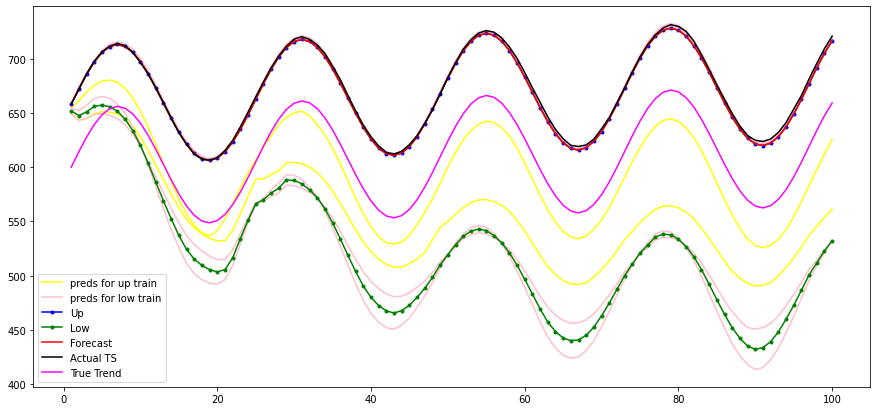

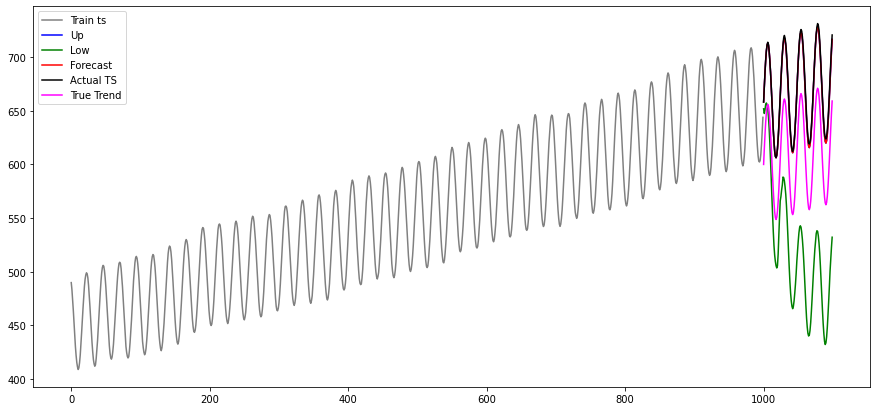

In [ ]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)